In [25]:
from sentence_transformers import SentenceTransformer
from sklearn.datasets import fetch_20newsgroups
import umap
import umap.plot
import numpy as np

# umap raises a bunch of warnings because dask (one of its dependencies) has 
# made some breaking changes at the beginning of 2025

In this notebook I'll use `sentence_transformers` to embed the messages from the 20 newsgroup dataset, and visualize them using UMAP.

I'll work with only 4 of the newsgroups, to limit the number of colors in the final visualization.

If you run this notebook make sure to use the GPU, otherwise computing the embedding may be too slow.

In [14]:
remove = ('headers','quotes')

# use only messages from the cryptography and medicine boards
cats = ( 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',)

newsgroups = fetch_20newsgroups(remove=remove,categories=cats)

In [ ]:
model = SentenceTransformer("all-mpnet-base-v2")

In [21]:
# Calculate embeddings 
embeddings = model.encode(newsgroups.data)

# similarities = model.similarity(query_embeddings, embeddings)

To visualize the embeddings, we use UMAP. 

In [ ]:
mapper = umap.UMAP().fit(embeddings)

Make an array with the newsgroup each message comes from, which is nice for visualization

In [23]:
categories_dict = {i:name for i,name in enumerate(newsgroups.target_names)}
readable_labels = np.array([categories_dict[label] for label in newsgroups.target])

As expected, the posts from the same newsgroup end up close to each other, with the medicine posts forming a cluster by themselves, further apart from electronics, cryptography, and space. 

The nice thing about sentence transformers is that sentences of any length all end up represented with a vector of the same dimension, and transformer-based methods are context aware, which takes care of semantic disambiguation.

<Axes: >

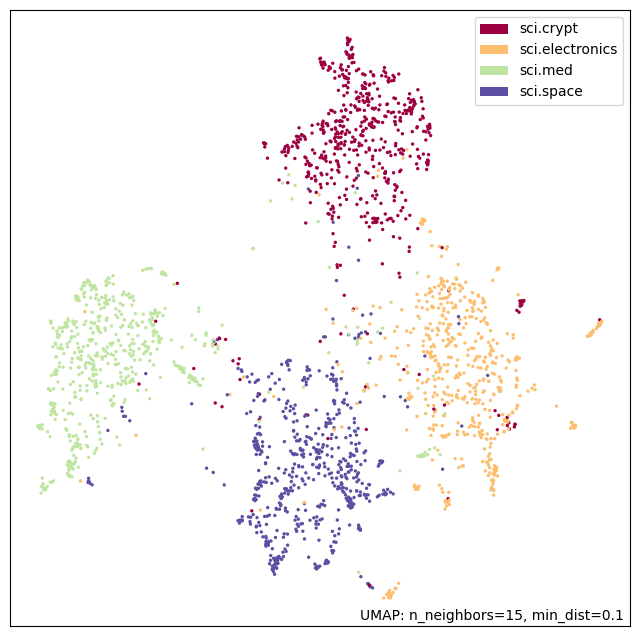

In [24]:
umap.plot.points(mapper,labels=readable_labels)